In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data_2D
from project_utils.surroagte_gp     import Surrogate_GP

Num_Points = 1


X shape (100, 2)
y shape (100,)


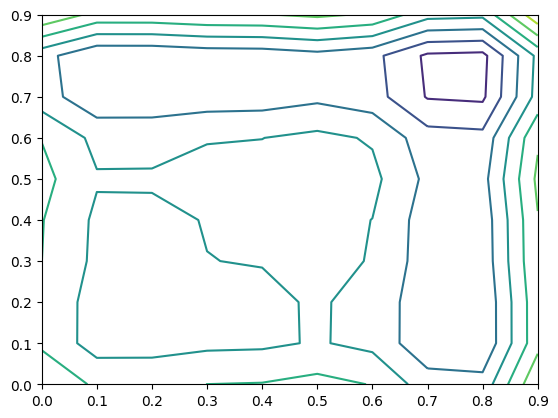

In [2]:
# Load Forrester model

Forrester_Data = BB_Model('forrester_2d')

#Forrester_Data.df().head()

In [3]:
Forrester_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.12773913092064504


MLPRegressor(random_state=RandomState(MT19937) at 0x14269849840)

In [4]:
Forrester_Data.Random_Forest()

0.7415768085934699


RandomForestRegressor(random_state=RandomState(MT19937) at 0x14269849840)

In [5]:
Forrester_Data.GP()

0.9760192456934607


GaussianProcessRegressor()

In [6]:
print(Forrester_Data.get_features())

['X1', 'X2']


In [7]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()

#Initializing the explainer object
URM_Exp = UR_Model(bbox_model           = Forrester_Data.get_GP(),
                   train_data           = X_train,
                   feature_names        = Forrester_Data.get_features(),
                   categorical_features = Forrester_Data.get_catagorical(),
                   mode                 = Forrester_Data.get_mode(),
                   sampling_optimize    = "opt")

#sur_GP = Surrogate_GP()


In [8]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [0.43875 0.45375]
Std 0:  [0.28128889 0.28633187]


In [9]:
# Generate explantion data for Random Forest

Forrester_Stats = Feature_Statistics(feature_names = Forrester_Data.get_features(), mode = Forrester_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
#    data_row  = np.array([X_test[test_instance]])
    data_row  = np.array([0.4, 0.4])
    print('data row ',data_row)
    
    #scores, acq_data = URM_Exp.explain(X_init            = data_row.reshape(1, -1),
    scores = URM_Exp.explain(X_init      = data_row.reshape(1, -11),
                             Dimension   = 'Two',
                             kernel_type = "Matern",
                             max_iter    = 20,
                             alpha       = "FUR_W",
                             #jitter=5,
                             interval    = 1,
                             normalize   = False)
       
    f_predict = Forrester_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = URM_Exp.exp_predict(data_row.reshape(-1, 1))
    e_predict = np.array(e_predict).ravel()
    
    acq_data = URM_Exp.get_acq_data()
    
#    X, y = URM_Exp.get_surrogate_data()

#    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(URM_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    Forrester_Stats.Add_Sample(sample_scores = scores,
                               outcome       = y_test[test_instance],
                               X_row         = data_row,
                               f_prediction  = f_predict,
                               e_prediction  = e_predict.ravel(),
                               feopt         = acq_data.get_fe_x0(),
                               model         = URM_Exp.get_exp_model())


INSTANCE:  0
data row  [0.4 0.4]
NEXT X:  [[0.68128889 0.68633187]]


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


NEXT X:  [[0.38422842 0.38394567]]
NEXT X:  [[0.56767333 0.5706794 ]]
NEXT X:  [[0.3262946 0.3249732]]


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


NEXT X:  [[0.51852765 0.52065262]]
NEXT X:  [[0.54189554 0.54444152]]
NEXT X:  [[0.51592281 0.51800109]]
NEXT X:  [[0.22015262 0.2169167 ]]
NEXT X:  [[0.11871111 0.11366813]]
NEXT X:  [[0.12775185 0.34265467]]
NEXT X:  [[0.32144864 0.54067082]]
NEXT X:  [[0.44269474 0.21421445]]
NEXT X:  [[0.30482659 0.11366813]]
NEXT X:  [[0.61063643 0.38226313]]
NEXT X:  [[0.23739062 0.42977527]]
NEXT X:  [[0.49709059 0.34045821]]
NEXT X:  [[0.45285087 0.45379834]]
NEXT X:  [[0.33790161 0.22976198]]
NEXT X:  [[0.39169243 0.39154348]]
NEXT X:  [[0.44392275 0.68633187]]
[0.39417695] [1.25677776e+00 1.00000004e-05]


<class 'ValueError'>: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
print(f_predict)
print(e_predict)


In [ ]:
Forrester_Stats.Fidelity()

In [ ]:
#Forrester_Stats.Jaccard_Values()

In [ ]:
Forrester_Stats.Reg_Fidelity_Graph()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

#X, y = URM_Exp.get_surrogate_data()
#kernel = Matern()

#GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 10, optimizer='fmin_l_bfgs_b', normalize_y = False, copy_X_train=True)
#GP.fit(X, y)
        
#print(y[0])
#fe = GP.predict(X[0].reshape(1,-1))
#print(fe)
#ey = URM_Exp.gpmodel_predict(X[0].reshape(1,-1))
#print(ey)


In [ ]:
#acq_data.Create_BB_plot()

In [ ]:
acq_data.plot_point(0)

In [ ]:
acq_data.plot_point(1)

In [ ]:
acq_data.plot_point(2)

In [ ]:
acq_data.plot_point(3)

In [ ]:
acq_data.plot_point(4)

In [ ]:
acq_data.plot_point(5)

In [ ]:
acq_data.plot_point(6)

In [ ]:
acq_data.plot_point(7)

In [ ]:
acq_data.plot_point(8)

In [ ]:
acq_data.plot_point(9)

In [ ]:
acq_data.plot_point(10)

In [ ]:
acq_data.plot_point(11)

In [ ]:
acq_data.plot_point(12)

In [ ]:
acq_data.plot_point(13)

In [ ]:
acq_data.plot_point(14)

In [ ]:
acq_data.plot_point(15)

In [ ]:
acq_data.plot_point(16)

In [ ]:
acq_data.plot_point(17)

In [ ]:
acq_data.plot_point(18)

In [ ]:
acq_data.plot_point(19)

In [ ]:
acq_data.plot_all()